In [78]:
import numpy as np

In [79]:
import pandas as pd

In [80]:
import matplotlib.pyplot as plt 

In [81]:
import seaborn as sns

In [82]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from termcolor import colored #for colored text printing
warnings.filterwarnings('ignore')

## Loading the data set- Breast cancer

In [83]:
from sklearn.datasets import load_breast_cancer

In [84]:
#df=load_breast_cancer(as_frame=True)
#data=pd.DataFrame(df.data,columns=[df.feature_names])
#data=data.assign(target=pd.Series(df.target))
#data=df.frame

In [85]:
cancer=load_breast_cancer()
df1=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df1['label']=cancer.target
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### <font color="#4863A0">Initial informations about the dataset

In [86]:
#Displaying the first 5 rows
print('The first five rows of the dataset are:\n')
df1.head()

The first five rows of the dataset are:



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [87]:
#checking if null values are there
df1.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [88]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [89]:
#Showing the shape of the dataset
print(df1.shape)
num_rows,num_cols=df1.shape
print(f'The no of rows:{num_rows}')
print(f'The no of columns:{num_cols}')

(569, 31)
The no of rows:569
The no of columns:31


In [90]:
#  Basic information from dataset like "Column names", "Data types" and "Non-null values counts"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [91]:
# Descriptive analysis of dataset
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

0 is malignant and 1 is benign label
1    357
0    212
Name: count, dtype: int64


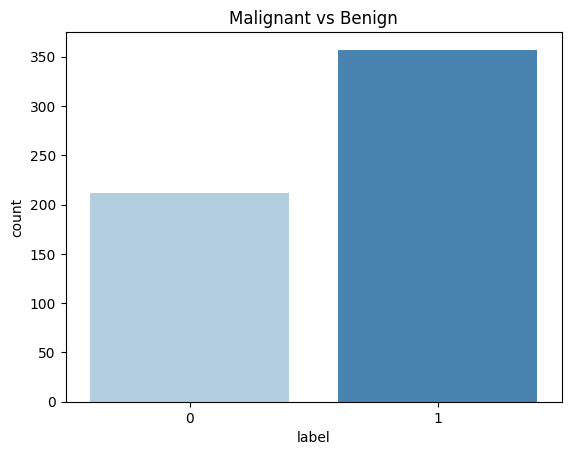

In [92]:
malignant=df1.label.value_counts(dropna=False)
print('0 is malignant and 1 is benign',malignant)
sns.countplot(x='label',data=df1,palette='Blues')
plt.title('Malignant vs Benign')
plt.show()

## Lets find the correlation between columns

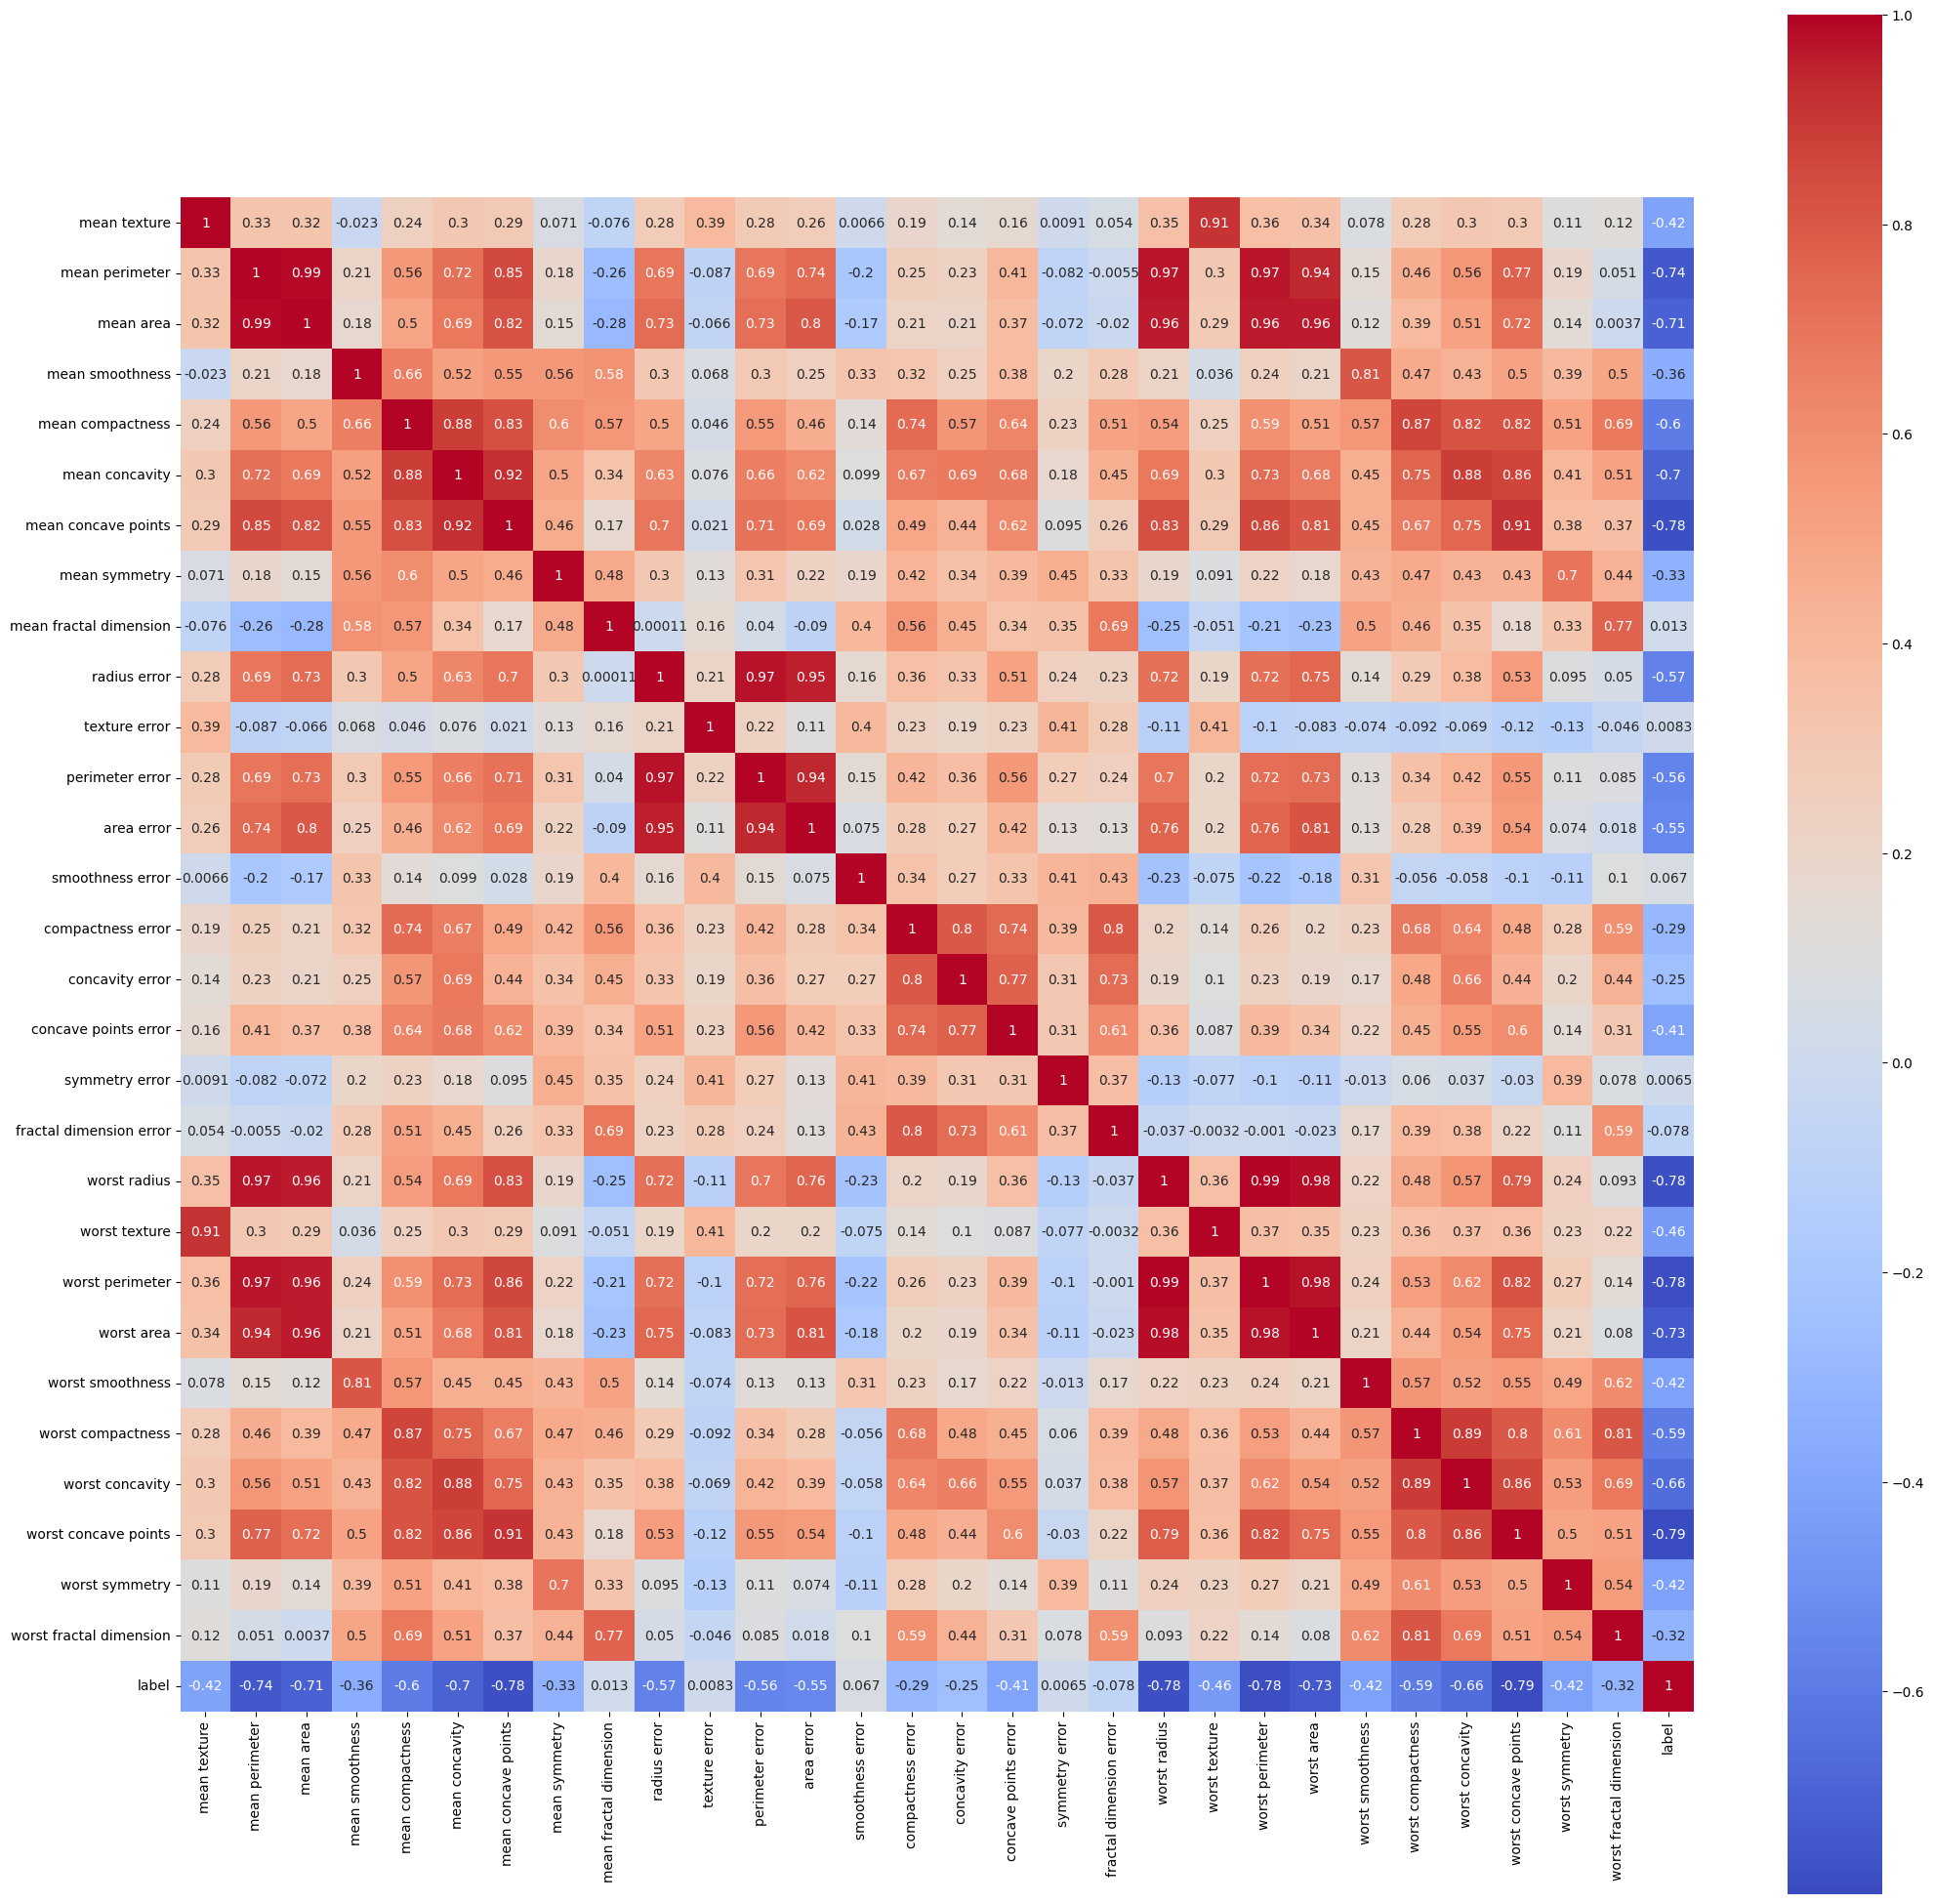

In [93]:
plt.figure(figsize=(25,25))
featureMeans = list(df1.columns[1:31])#Our dataset already contains the mean values of all the columns

sns.heatmap(df1[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# 2. Classification Algorithm Implementation (5 marks)

In [94]:
#Defining features and target
x=df1.drop('label',axis=1) #Features
y=df1['label']#Target

### 1. Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
#splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(x,y)

In [97]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [98]:
logreg=LogisticRegression()
logreg.fit(x_train,Y_train)

LogisticRegression()

In [99]:
#making predictions
y_pred=logreg.predict(x_test)

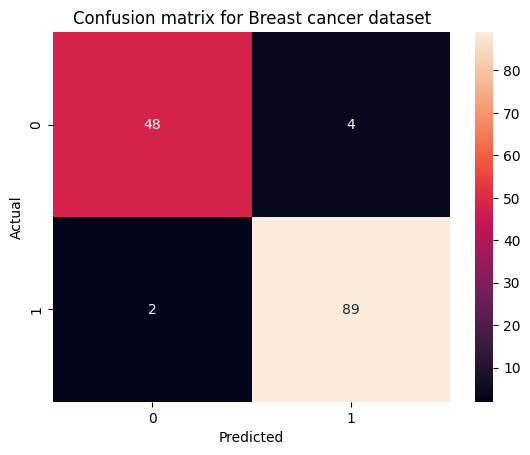

In [100]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Breast cancer dataset')
plt.show()

In [101]:
print('Confusion matrix')
print(cm)

Confusion matrix
[[48  4]
 [ 2 89]]


In [102]:
#calssification report
log_cr=classification_report(Y_test,y_pred)
print('Classification report')
print(log_cr)

Classification report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.96      0.98      0.97        91

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [103]:
#Accuracy score
log_accuracy=accuracy_score(Y_test,y_pred)
print('Accuracy score')
print(log_accuracy)

Accuracy score
0.958041958041958


In [104]:
y_pred#predicted

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [105]:
Y_test#actual

212    0
347    1
183    1
50     1
86     0
      ..
420    1
496    1
321    0
178    1
409    1
Name: label, Length: 143, dtype: int32

### 2.SVM(Support Vector Machine) 

In [106]:
from sklearn.svm import SVC

In [107]:
svm_model=SVC()

In [108]:
svm_model.fit(X_train,Y_train)

SVC()

In [109]:
y_pred=svm_model.predict(X_test)

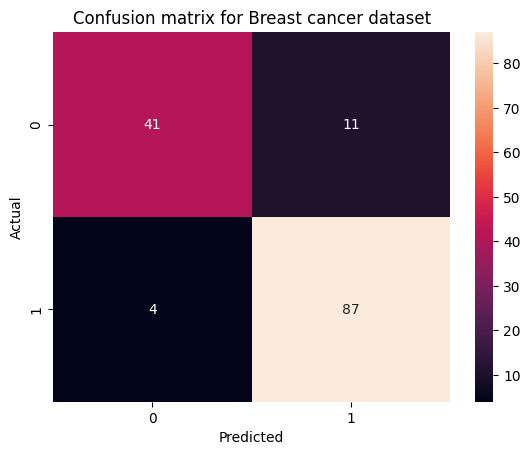

In [110]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Breast cancer dataset')
plt.show()

In [111]:
print('Confusion matrix')
print(cm)

Confusion matrix
[[41 11]
 [ 4 87]]


In [112]:
#calssification report
svm_cr=classification_report(Y_test,y_pred)
print('Classification report')
print(svm_cr)

Classification report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        52
           1       0.89      0.96      0.92        91

    accuracy                           0.90       143
   macro avg       0.90      0.87      0.88       143
weighted avg       0.90      0.90      0.89       143



In [113]:
#Accuracy score
svm_ar=accuracy_score(Y_test,y_pred)
print('Accuracy score')
print(svm_ar)

Accuracy score
0.8951048951048951


In [114]:
y_pred#predicted

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [115]:
Y_test#actual

212    0
347    1
183    1
50     1
86     0
      ..
420    1
496    1
321    0
178    1
409    1
Name: label, Length: 143, dtype: int32

### 3.Decision tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [118]:
y_pred=dt_model.predict(X_test)

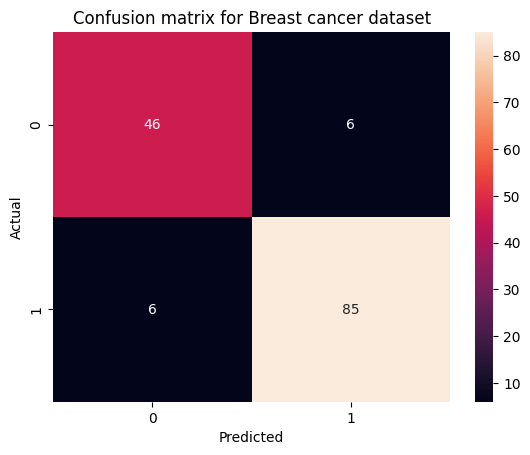

In [119]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Breast cancer dataset')
plt.show()

In [120]:
print('Confusion matrix')
print(cm)

Confusion matrix
[[46  6]
 [ 6 85]]


In [121]:
#Classification report
dt_cr=classification_report(Y_test,y_pred)
print('Classification report')
print(dt_cr)

Classification report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.93      0.93      0.93        91

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [122]:
#Accuracy score
dt_ar=accuracy_score(Y_test,y_pred)
print('Accuracy score')
print(dt_ar)

Accuracy score
0.916083916083916


In [123]:
Y_test#actual

212    0
347    1
183    1
50     1
86     0
      ..
420    1
496    1
321    0
178    1
409    1
Name: label, Length: 143, dtype: int32

In [124]:
y_pred#Predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

### 4.KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [127]:
y_pred=knn.predict(X_test)

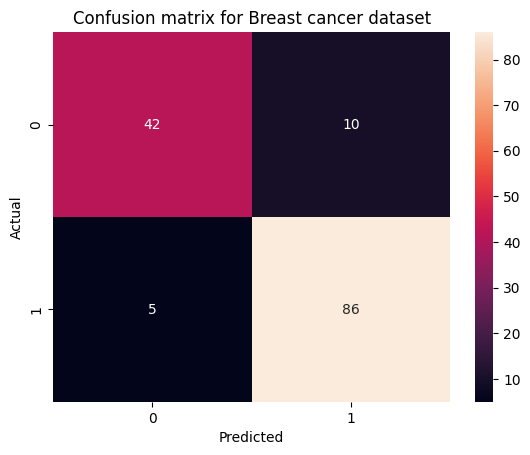

In [128]:
#Confusion matrix
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Breast cancer dataset')
plt.show()

In [129]:
#Classification report
knn_cr=classification_report(Y_test,y_pred)
print('Classification report')
print(knn_cr)

Classification report
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        52
           1       0.90      0.95      0.92        91

    accuracy                           0.90       143
   macro avg       0.89      0.88      0.88       143
weighted avg       0.90      0.90      0.89       143



In [130]:
#Accuracy score
knn_ar=accuracy_score(Y_test,y_pred)
print('Accuracy score')
print(knn_ar)

Accuracy score
0.8951048951048951


In [131]:
y_pred#predicted

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [132]:
Y_test#actual

212    0
347    1
183    1
50     1
86     0
      ..
420    1
496    1
321    0
178    1
409    1
Name: label, Length: 143, dtype: int32

###  5.Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfcl=RandomForestClassifier(n_estimators=100,max_features=30,random_state=0)
rfcl.fit(X_train,Y_train)

RandomForestClassifier(max_features=30, random_state=0)

In [135]:
y_pred=rfcl.predict(X_test)

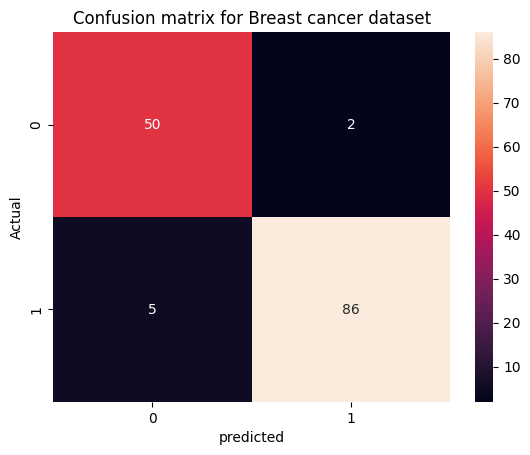

In [136]:
#confusion matrix
rfcl_cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(rfcl_cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Breast cancer dataset')
plt.show()

In [137]:
print('Confusion matrix')
print(rfcl_cm)

Confusion matrix
[[50  2]
 [ 5 86]]


In [138]:
#classification report
rfcl_cr=classification_report(Y_test,y_pred)
print('Classification report')
print(rfcl_cr)

Classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.98      0.95      0.96        91

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [139]:
#Accuracy score
rfcl_ar=accuracy_score(Y_test,y_pred)
print('Accuracy score')
print(rfcl_ar)

Accuracy score
0.951048951048951


In [140]:
Y_test#Actual

212    0
347    1
183    1
50     1
86     0
      ..
420    1
496    1
321    0
178    1
409    1
Name: label, Length: 143, dtype: int32

In [141]:
y_pred#predicted

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

###  Model Comparison

In [142]:
print('Classification report and accuracy score of Logistic regression model:')
print(log_cr)
print('Accuracy score:',log_accuracy)
print('Classification report and accuracy score of SVM model:')
print(svm_cr)
print('Accuracy score:',svm_ar)
print('Classification report and accuracy score of Decision tree model:')
print(dt_cr)
print('Accuracy score:',dt_ar)
print('Classification report and accuracy score of KNN model:')
print(knn_cr)
print('Accuracy score:',knn_ar)
print('Classification report and accuracy score of Random forest classifier model:')
print(rfcl_cr)
print('Accuracy score:',rfcl_ar)

Classification report and accuracy score of Logistic regression model:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.96      0.98      0.97        91

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Accuracy score: 0.958041958041958
Classification report and accuracy score of SVM model:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        52
           1       0.89      0.96      0.92        91

    accuracy                           0.90       143
   macro avg       0.90      0.87      0.88       143
weighted avg       0.90      0.90      0.89       143

Accuracy score: 0.8951048951048951
Classification report and accuracy score of Decision tree model:
              precision    recall  f1-score   support

           0       0.88      0.

### As from the values of f1score and accuracy score of each model its clear that,
### The most The Loggistic regression model performed the best.
### The support vector machine(SVM) model and KNearest Neighbor(KNN) are the least acuurate(both have same value)